In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas_ta as ta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [25]:
import tensorflow as tf
from tensorflow import keras


In [26]:
df_nflx_intraday = pd.read_csv('data_nflx_intraday.csv', index_col=0, parse_dates=True) # will be our working df
df = df_nflx_intraday.copy() # working df
df.columns = df.columns.str.lower()

In [27]:
df.head()

,open,high,low,close,volume
date,,,,,
2023-07-27 04:00:00,423.01,425.61,423.01,425.00,1150.0
2023-07-27 04:01:00,425.43,427.26,425.00,427.26,677.0
2023-07-27 04:02:00,427.19,427.19,426.00,426.70,341.0
2023-07-27 04:03:00,426.76,427.01,426.65,426.84,140.0
2023-07-27 04:04:00,426.84,427.64,426.84,427.49,117.0


In [28]:
""" # adding a few indicators
df['rsi'] = ta.rsi(df['close'], length=30)
df['ad'] = ta.ad(df['high'], df['low'], df['close'], df['volume']) # Accumulation/Distribution Line
bbands = ta.bbands(df['close'], length=10, mamode="ema") #  Returns: pd.DataFrame: lower, mid, upper, bandwidth, and percent columns.
df[['bbandsl', 'bbandsm', 'bbandsu','bbandsb', 'bbandsp']] = bbands[['BBL_10_2.0', 'BBM_10_2.0', 'BBU_10_2.0', 'BBB_10_2.0', 'BBP_10_2.0']]

# getting rid of nan
df.dropna(inplace=True) """

df.ta.strategy()

63it [00:05, 10.80it/s]


AttributeError: 'Series' object has no attribute 'append'

In [29]:
df.info()
df['price_increased'] = np.where(df['close'].diff() > 0, 1, 0)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17506 entries, 2023-07-27 04:00:00 to 2023-08-24 19:59:00
Columns: 176 entries, open to MAD_30
dtypes: float64(169), int32(7)
memory usage: 23.2 MB


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17506 entries, 2023-07-27 04:00:00 to 2023-08-24 19:59:00
Columns: 177 entries, open to price_increased
dtypes: float64(169), int32(8)
memory usage: 23.2 MB


In [31]:
df.dropna(inplace=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4932 entries, 2023-07-27 05:53:00 to 2023-08-24 19:19:00
Columns: 177 entries, open to price_increased
dtypes: float64(169), int32(8)
memory usage: 6.5 MB


In [33]:
# dividing X and y
X = df.drop(columns=['price_increased'])
y = df[['price_increased']]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [50]:
num_features = X_train.shape[1]

In [ ]:
""" # Creating model using sequential API ** PAGE 296 **
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(num_features,)))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax")) """

In [51]:
# Creating model using sequential API ** PAGE 296 **
model = keras.models.Sequential([
 keras.layers.Flatten(input_shape=(num_features,)),
 keras.layers.Dense(300, activation="relu"),
 keras.layers.Dense(100, activation="relu"),
 keras.layers.Dense(1, activation="sigmoid")
])


In [52]:
# Compiling the model
model.compile(loss="binary_crossentropy",
                optimizer="sgd",
                metrics=["accuracy"])

In [53]:
# Training and evaluating the model
history = model.fit(X_train, y_train, epochs=30,
                     validation_split=0.1, batch_size=32 )

Epoch 1/30
111/111 [==============================] - 1s 2ms/step - loss: 0.5657 - accuracy: 0.7566 - val_loss: 0.4631 - val_accuracy: 0.9873
Epoch 2/30
111/111 [==============================] - 0s 1ms/step - loss: 0.3644 - accuracy: 0.9794 - val_loss: 0.2692 - val_accuracy: 0.9873
Epoch 3/30
111/111 [==============================] - 0s 1ms/step - loss: 0.1971 - accuracy: 0.9961 - val_loss: 0.1429 - val_accuracy: 0.9899
Epoch 4/30
111/111 [==============================] - 0s 2ms/step - loss: 0.1119 - accuracy: 0.9980 - val_loss: 0.0886 - val_accuracy: 0.9949
Epoch 5/30
111/111 [==============================] - 0s 1ms/step - loss: 0.0711 - accuracy: 0.9989 - val_loss: 0.0595 - val_accuracy: 1.0000
Epoch 6/30
111/111 [==============================] - 0s 1ms/step - loss: 0.0492 - accuracy: 0.9994 - val_loss: 0.0433 - val_accuracy: 1.0000
Epoch 7/30
111/111 [==============================] - 0s 1ms/step - loss: 0.0362 - accuracy: 1.0000 - val_loss: 0.0332 - val_accuracy: 1.0000
Epoch 

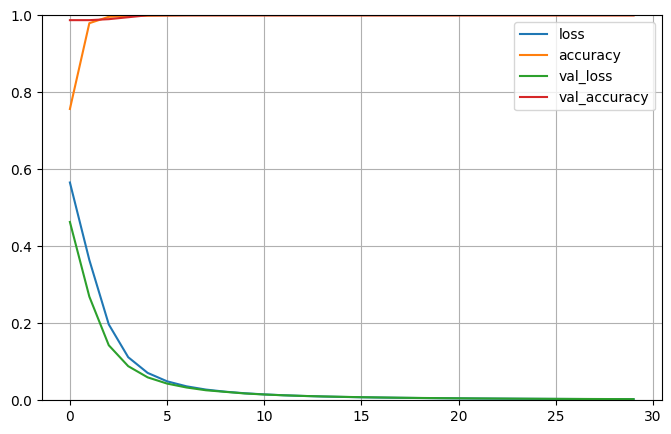

In [54]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()


Conclusion: this is really good since both the losses are falling and both the accuracies are increasing. And the fact that the curves are really close to each other this means we dont have overfitting happening. 
If we are not happy with the result we can tune the 
    hyperparameters ( number of layers, number of neurons per layer, type of activation for each hidden layer, the epochs, batch siz (it can be set in the fit() method using the
batch_size argument, which defaults to 32)) 

In [55]:
# Evaluating the model
model.evaluate(X_test, y_test)

31/31 [==============================] - 0s 667us/step - loss: 0.0027 - accuracy: 1.0000


[0.0026685649063438177, 1.0]

In [56]:
# Using the model to make predictions
X_new = X_test[:10]
y_proba = model.predict(X_new)
y_proba.round(2)


1/1 [==============================] - 0s 61ms/step


array([[0.  ],
       [0.99],
       [0.01],
       [0.99],
       [0.  ],
       [0.  ],
       [1.  ],
       [0.99],
       [0.  ],
       [0.  ]], dtype=float32)

In [57]:
y_test[:10]

,price_increased
date,
2023-08-22 14:40:00,0
2023-08-02 14:52:00,1
2023-08-22 19:17:00,0
2023-08-22 08:25:00,1
2023-07-27 16:36:00,0
2023-07-31 08:17:00,0
2023-08-08 12:01:00,1
2023-07-27 11:40:00,1
2023-07-31 15:10:00,0
